# EDA4

# Introduction

This competition is hosted by the third largest insurance company in Brazil: [Porto Seguro](https://en.wikipedia.org/wiki/Porto_Seguro_S.A.) with the task of predicting the *probability that a driver will initiate an insurance claim in the next year.*

This notebook will aim to provide some interactive charts and analysis of the competition data by way of the Python visualisation library Plot.ly and hopefully bring some insights and beautiful plots that others can take and replicate. Plot.ly is one of the main products offered by the software company - [Plotly](https://plot.ly/) which specializes in providing online graphical and statistical visualisations (charts and dashboards) as well as providing an API to a whole rich suite of programming languages and tools such as Python, R, Matlab, Node.js etc.

Listed below for easy convenience are links to the various Plotly plots in this notebook:

* Simple horizontal bar plot - Used to inspect the Target variable distribution
* Correlation Heatmap plot  - Inspect the correlation between the different features
* Scatter plot - Compare the feature importances generated by Random Forest and Gradient-Boosted model
* Vertical bar plot - List in Descending order, the importance of the various features
* 3D Scatter plot 

The themes in this notebook can be briefly summarized follows:

   [**1. Data Quality Checks**](#quality) - Visualising and evaluating all missing/Null values (values that are -1)

**2. Feature inspection and filtering** - Correlation and feature Mutual information plots against the target variable. Inspection of the Binary, categorical and other variables.

**3. Feature importance ranking via learning models** 
/n Building a Random Forest and Gradient Boosted model to help us rank features based off the learning process.

Let's Go

導入  
この大会は、ブラジルの3番目に大きな保険会社、ポルト・セグロが主催し、来年に運転手が保険金請求を開始する可能性を予測するものです。

このノートブックは、PythonビジュアライゼーションライブラリPlot.lyを使っていくつかのインタラクティブなチャートと競合データの分析を提供し、他の人が取ったり複製したりできるいくつかの洞察と美しいプロットをもたらすことを目指します。 Plot.lyは、オンラインのグラフィカルおよび統計的な視覚化（チャートおよびダッシュボード）の提供を専門とするソフトウェア会社Plotlyが提供する主要製品の1つであり、Python、 R、Matlab、Node.jsなど

簡単な利便性のために、以下の表は、このノートブックのさまざまなPlotlyプロットへのリンクです：

・単純な横棒グラフ - ターゲット変数の分布を検査するために使用されます  
・相関ヒートマッププロット - 異なるフィーチャ間の相関関係を検査する  
・散布図 - ランダムフォレストとグラデーションブーストモデルで生成されたフィーチャの高さを比較します。  
・縦棒グラフ - 降順のリスト、さまざまな機能の重要性  
・3D散布図  

このノートブックのテーマは以下のように簡単に要約できます：

1.データ品質チェック - すべての欠損値/ヌル値（-1の値）の可視化と評価

2.フィーチャの検査とフィルタリング - 相関とフィーチャターゲット変数に対する相互情報のプロット。バイナリ、  
　カテゴリおよびその他の変数の検査。  

3.学習モデルによる特徴の重要度ランキング/ n学習プロセスに基づいて特徴をランク付けするのに役立つランダム  
　フォレストとグラジエントブーストモデルを構築する。

行こう

In [62]:
# 各種ライブラリをインポート
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')
from PIL import  Image
from pylab import *
from IPython.display import Image as Ipy_Image
from IPython.display import display_png

Let us load in the training data provided using Pandas:

Pandasを使用して提供されたトレーニングデータを読み込みましょう。

In [63]:
#データを読み込む
train = pd.read_csv("./input/train.csv")
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


２値のデータ列がいくつかあるようだ、また、idは連番になっているわけではない

In [64]:
# trainデータが何行何列であるか確認
rows = train.shape[0]
columns = train.shape[1]
print("The train dataset contains {0} rows and {1} columns".format(rows, columns))

The train dataset contains 595212 rows and 59 columns


<a id='quality'></a>
## 1. Data Quality checks

**Null or missing values check**

As part of our quality checks, let us quick look at whether there are any null values in the train dataset as follows:

1.データ品質チェック  
ヌル値または欠損値のチェック

品質チェックの一環として、次のように訓練データセットにヌル値があるかどうかを素早く見てみましょう。

In [65]:
# tranデータの全ての列に対してにnull値がないかチェックする(最初のanyで行方向に結果がまとめられ、２個目のanyで列方向もまとめられて1つの値になる)
train.isnull().any().any()

False

* Our null values check returns False but however, this does not really mean that this case has been closed as the data is also described as ["Values of -1 indicate that the feature was missing from the observation"](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data). Therefore I take it that Porto Seguro has simply conducted a blanket replacement of all null values in the data with the value of -1. Let us now inspect if there where any missing values in the data.


・私たちのヌル値チェックはFalseを返しますが、データが "-1の値は観測から欠落していることを示します"と記述されているため、このケースが閉じられたということを意味しません。 したがって、ポルト・セグロは、データのすべてのヌル値を-1の値でブランケット置換しただけです。 データの欠損値がどこにあるのか調べてみましょう。

Here we can see that which columns contained -1 in their values so we could easily for example make a blanket replacement of all -1 with nulls first as follows:

ここでは、どの列が値に-1を含んでいるかを見ることができます。たとえば、次のように、すべて-1のヌルを最初にブランケット置換することができます。

In [66]:
#trainデータのコピーを作り、-1をnanに置換する（今回のデータでは-1はデータがないことを意味しているためnanに置き換える必要がある）
train_copy = train
train_copy = train_copy.replace(-1, np.NaN)

Next, we can use resident Kaggler's [Aleksey Bilogur](https://www.kaggle.com/residentmario) - creator of the  "Missingno" package which is a most useful and convenient tool in visualising missing values in the dataset, so check it out.

次に、データセットの欠損値を視覚化する上で最も有用で便利なツールである「Missingno」パッケージの作成者、KagglerのAleksey Bilogur氏を使用することができます。

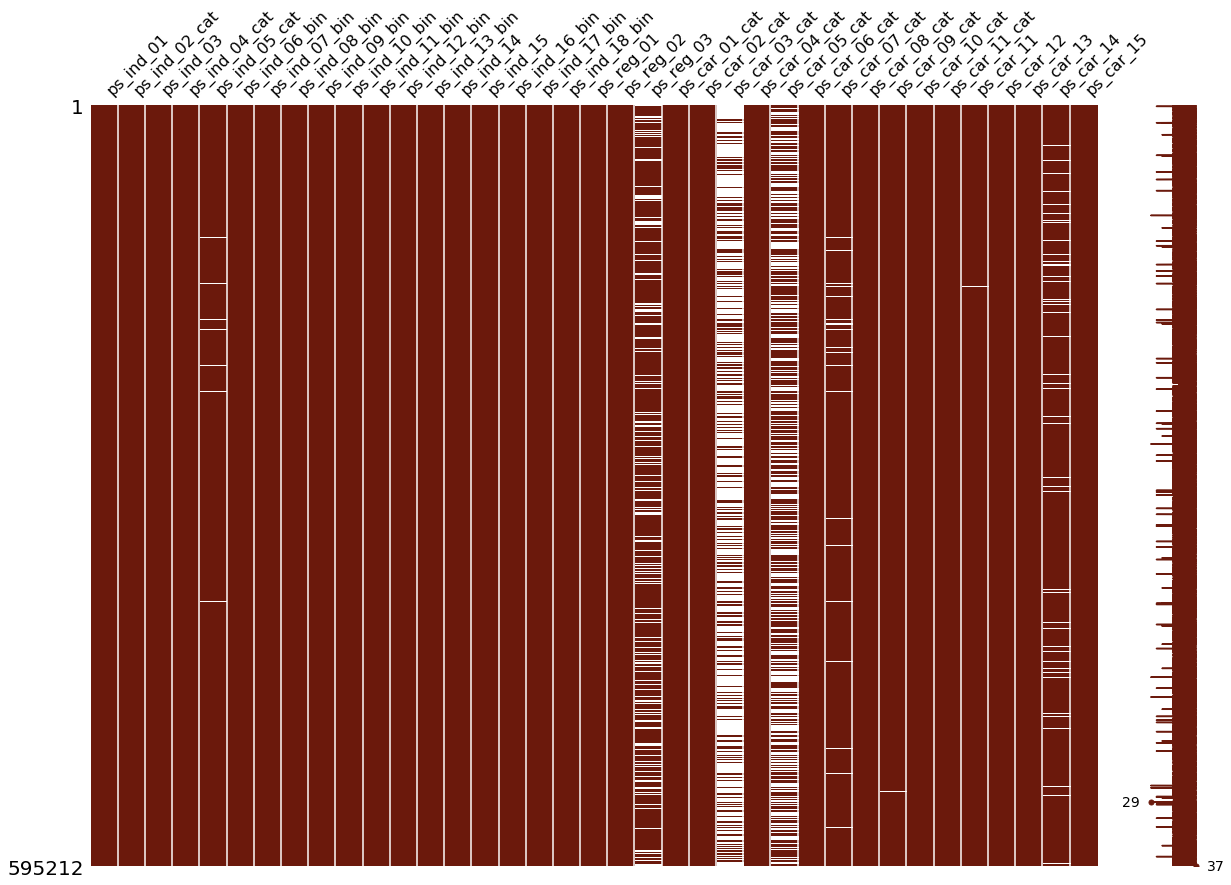

In [67]:
#どこに欠落データがあるかを可視化する（色が背景と同じ、つまり白い箇所が欠損データ、また、０列目と１列目は分析対象ではないため除外）
import missingno as msno
msno.matrix(df=train_copy.iloc[:,2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

特定の列に欠損データが多いことがわかる

As we can see, the missing values now become much more apparent and clear when we visualise it, where the empty white bands (data that is missing) superposed on the vertical dark red bands (non-missing data) reflect the nullity of the data in that particular column. In this instance, we can observe that there are 7 features out of the 59 total features (although as rightly pointed out by Justin Nafe in the comments section there are really a grand total of 13 columns with missing values) that actually contained null values. This is due to the fact that the missingno matrix plot can only comfortable fit in approximately 40 odd features to one plot after which some columns may be excluded, and hence the remaining 5 null columns have been excluded. To visualize all nulls, try changing the figsize argument as well as tweaking how we slice the dataframe.

For the 7 null columns that we are able to observe, they are hence listed here as follows:

**ps_ind_05_cat | ps_reg_03 | ps_car_03_cat | ps_car_05_cat | ps_car_07_cat | ps_car_09_cat | ps_car_14**

Most of the missing values occur in the columns suffixed with _cat. One should really take further note of the columns ps_reg_03, ps_car_03_cat and ps_car_05_cat. Evinced from the ratio of white to dark bands, it is very apparent that a big majority of values are missing from these 3 columns, and therefore a blanket replacement of -1 for the nulls might not be a very good strategy.

わかるように、欠けている値は、視覚化すると明らかになります。空白の白いバンド（欠落しているデータ）は、縦の濃い赤いバンド（重複していないデータ）に重なってデータの無効を反映しますその特定の列に表示されます。この例では、59の全体の特徴のうち7つの特徴があることがわかります（コメントセクションのJustin Nafeが本当に指摘しているように、実際にヌル値を含む合計13列の値が欠落しています）。これは、不足しているマトリックス・プロットが約40個の奇数のフィーチャーに1つのプロットにしか快適に収まらず、その後いくつかの列が除外され、残りの5つのヌル列が除外されているためです。すべてのヌルを視覚化するには、データフレームをスライスする方法を調整するだけでなく、figsize引数を変更してみてください。

私たちが見ることができる7つのヌル列については、以下のようにここにリストされています。

ps_ind_05_cat | ps_reg_03 | ps_car_03_cat | ps_car_05_cat | ps_car_07_cat | ps_car_09_cat | ps_car_14

欠損値の大部分は、_catで終わる列に現れます。実際にps_reg_03、ps_car_03_cat、ps_car_05_catという列にさらに注意する必要があります。白からダークのバンドの比率から明らかなように、これらの3つの列から値の大多数が欠落していることは非常に明白であり、したがって、ヌルの-1のブランケット置換は非常に良い戦略ではないかもしれません。

**Target variable inspection**

Another standard check normally conducted on the data is with regards to our target variable, where in this case, the column is conveniently titled "target". The target value also comes by the moniker of class/label/correct answer and is used in supervised learning models along with the corresponding data that is given (in our case all our train data except the id column) to learn the function that best maps the data to our target in the hope that this learned function can generalize and predict well with new unseen data.

目標変数調査  

データ上で通常行われるもう1つの標準チェックは、この場合、列が便宜的に「ターゲット」と題されたターゲット変数に関するものです。 目標値は、クラス/ラベル/正解のモニカによっても与えられ、与えられた対応するデータ（私たちの場合はid列以外のすべての列車データ）と共に教師あり学習モデルで使用され、最良のマップ この学習された特徴が新しい目に見えないデータでも一般化して予測できることを期待して、データをターゲットに送信します。

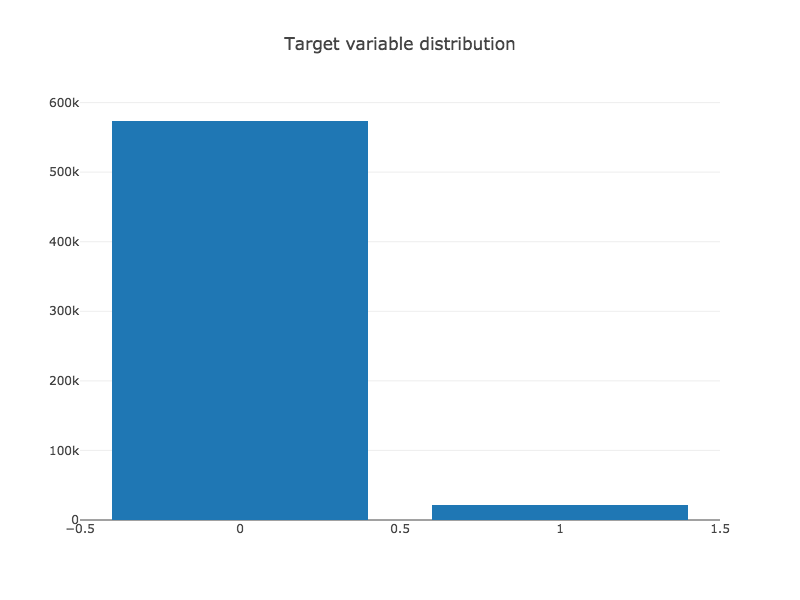

In [68]:
# 　target列の可視化
data = [go.Bar(
            x = train["target"].value_counts().index.values,
            y = train["target"].value_counts().values,
            text='Distribution of target variable'
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)
#py.iplot(fig, filename='basic-bar')

display_png(Ipy_Image('basic-bar.png'))

traget列のデータは０、１の２値であり、０が圧倒的に多いことがわかる

Hmmn, the target variable is rather imbalanced so it might be something to keep in mind. An imbalanced target will prove quite

うーん、目標変数はむしろ不均衡なので、心に留めておくべきことかもしれません。 不均衡な目標は、かなり証明されます。

**Datatype check**

This check is carried out to see what kind of datatypes the train set is comprised of : integers or characters or floats just to gain a better overview of the data we were provided with. One trick to obtain counts of the unique types in a python sequence is to use the Counter method, when you import the **Collections** module as follows:

データ型チェック  

このチェックは、訓練セットがどのような種類のデータ型で構成されているかを確認するために実行されます。文字列または浮動小数点数は、提供されたデータのより良い概要を得るためにのみ使用されます。 Pythonシーケンスで一意の型の数を取得する1つのトリックは、次のようにCollectionsモジュールをインポートするときにCounterメソッドを使用することです。

In [69]:
# Counterメソッドを用いて各データタイプが何個存在するかを確認する
Counter(train.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

As alluded to above, there are a total of 59 columns that make up the train dataset and as we can observe from this check, the features/columns consist of only two datatypes - Integer and floats. 

Another point to note is that Porto Seguro has actually provided us data with headers that come suffixed with abbreviations such as "_bin", "_cat" and "_reg", where they have given us a rough explanation that _bin indicates binary features while _cat indicates categorical features whilst the rest are either continuous or ordinal features. Here I shall simplify this a bit further just by looking at float values (probably only the continuous features) and integer datatypes (binary, categorical and ordinal features).

上記のようにtrainデータセットを構成する合計59の列があり、このチェックからわかるように、特徴/列は整数と浮動小数点の2つのデータ型のみで構成されています。

Porto Seguroは実際には、_bin、_cat、_regのような略語が末尾に付いたヘッダーをデータとして提供しています。_catはバイナリ特徴を示し 残りの部分は連続的または序数的な特徴のいずれかである。 ここでは、浮動小数点数（たぶん連続特徴のみ）と整数データ型（バイナリ、カテゴリ、および序数特徴）を見るだけでこれをもう少し単純化します。

In [70]:
# 特定のデータ型のデータだけを取得する
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

## Correlation plots

As a starter, let us generate some linear correlation plots just to have a quick look at how a feature is linearly correlated to the next and perhaps start gaining some insights from here. At this juncture, I will use the seaborn statistical visualisation package to plot a heatmap of the correlation values. Conveniently, Pandas dataframes come with the corr() method inbuilt, which calculates the Pearson correlation. Also as convenient is Seaborn's way of invoking a correlation plot. Just literally the word "heatmap"

**Correlation of float features**

相関プロット  
まず、フィーチャが次の特徴とどのように線形関係にあるかを素早く見て、ここからいくつかの洞察を得ることを開始するために、いくつかの線形相関プロットを生成してみましょう。 ここでは、シーボーンの統計的視覚化パッケージを使用して、相関値のヒートマップをプロットします。 便利なことに、Pandasのデータフレームには、Pearson相関を計算するcorr（）メソッドが組み込まれています。 また、シーボーンの相関プロットの呼び出し方法も便利です。 ちょうど文字通り言葉 "ヒートマップ"です

浮動小数点機能の相関

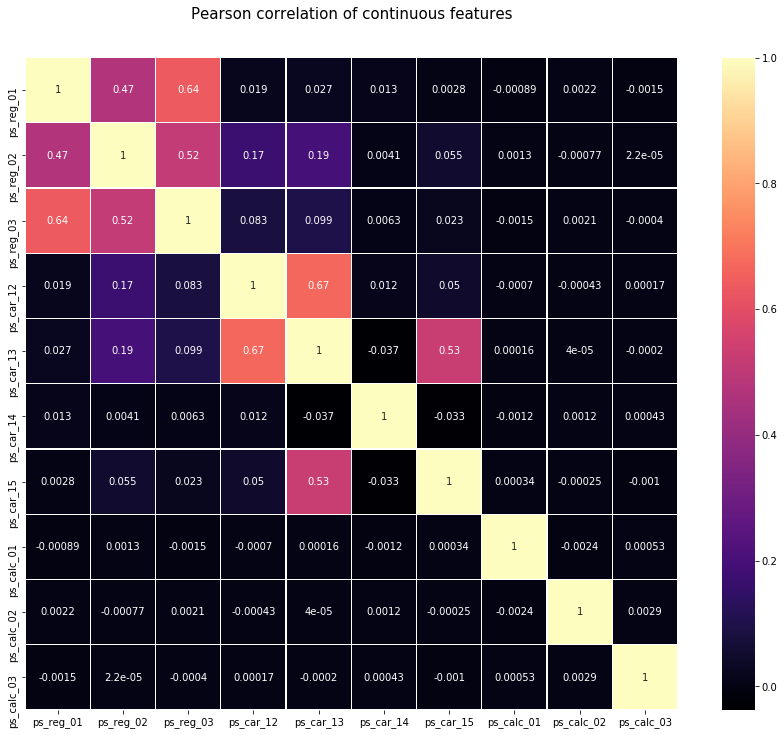

In [71]:
#float型のデータの列同士の相関を可視化する
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(train_float.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

一部に0.５、0.６程度の正の相関がみられるが、ほとんどの列間で相関はない。

From the correlation plot, we can see that the majority of the features display zero or no correlation to one another. This is quite an interesting observation that will warrant our further investigation later down. For now, the paired features that display a positive linear correlation are listed as follows:

**(ps_reg_01, ps_reg_03)**

**(ps_reg_02, ps_reg_03)**

**(ps_car_12, ps_car_13)**

**(ps_car_13, ps_car_15)**

相関プロットから、大部分の特徴は互いにゼロまたは非相関を表示することがわかります。 これは私たちのさらなる調査を後で保証することになる、非常に興味深い観察です。 現時点では、正の線形相関を示す対の特徴が次のようにリストされています。

**Correlation of integer features**

For the columns of interger datatype, I shall now switch to using the Plotly library to show how one can also generate a heatmap of correlation values interactively. Much like our earlier Plotly plot, we generate a heatmap object by simply invoking the "go.Heatmap". Here we have to provide values to three different axes, where x and y axes take in the column names while the correlation value is provided by the z-axis. The colorscale attribute takes in keywords that correspond to different color palettes that you will see in the heatmap where in this example, I have used the Greys colorscale (others include Portland and Viridis - try it for yourself). 

整数特徴の相関  

intergerデータ型の列については、Plotlyライブラリを使用して、相関値のヒートマップをインタラクティブに生成する方法を示します。以前のPlotlyプロットと同様に、単に "go.Heatmap"を呼び出すことでヒートマップオブジェクトを生成します。 ここでは、3つの異なる軸に値を入力する必要があります。ここで、x軸とy軸は列名を取り込み、相関値はz軸で与えられます。 colorscale属性は、ヒートマップに表示されるさまざまなカラーパレットに対応するキーワードを取ります。この例では、私はGraysのカラースケールを使用しています（他のものにはPortlandとViridisが含まれます）。

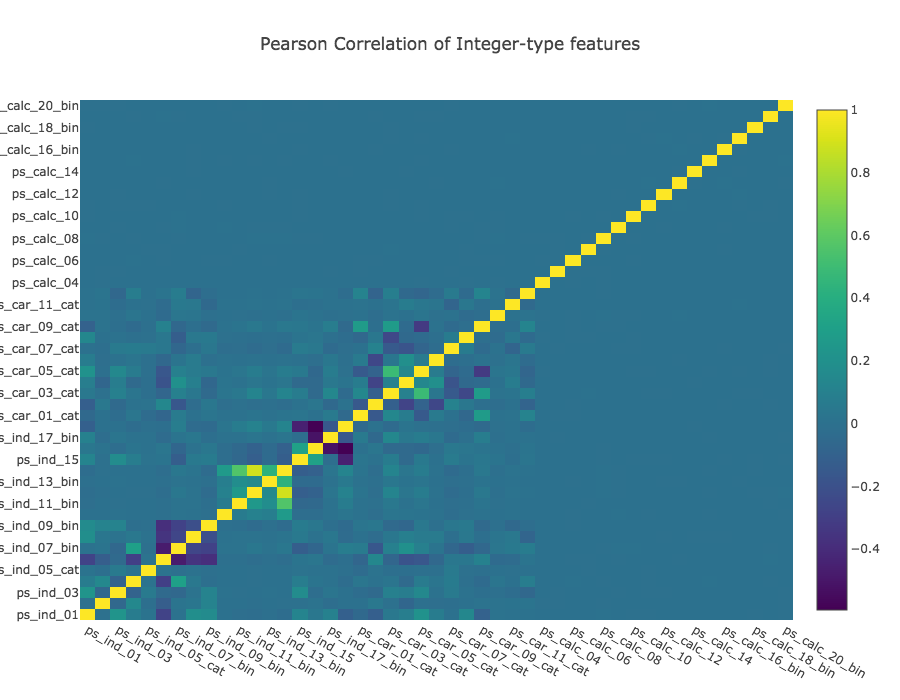

In [72]:
# int型のデータ列同士の相関関係を可視化する
data = [
    go.Heatmap(
        z= train_int.corr().values,
        x=train_int.columns.values,
        y=train_int.columns.values,
        colorscale='Viridis',
        reversescale = False,
        text = True ,
        opacity = 1.0 )
]

layout = go.Layout(
    title='Pearson Correlation of Integer-type features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700)

fig = go.Figure(data=data, layout=layout)
#py.iplot(fig, filename='labelled-heatmap')

display_png(Ipy_Image('labelled-heatmap.png'))

ほとんどの列間で相関はない、ごく一部に強い正の相関、または、負の相関が見られる  
（ピアソン相関係数は単純な線形関係の場合にしか正しい値が出ないため参考程度に捉える）

Similarly, we can observe that there are a huge number of columns that are not linearly correlated with each other at all, evident from the fact that we observe quite a lot of 0 value cells in our correlation plot. This is quite a useful observation to us, especially if we are trying to perform dimensionality reduction transformations such as Principal Component Analysis (PCA), this would require a certain degree of correlation  . We can note some features of interest are as follows:

***Negatively correlated features*** : ps_ind_06_bin, ps_ind_07_bin,  ps_ind_08_bin,  ps_ind_09_bin

One interesting aspect to note is that in our earlier analysis on nullity, ps_car_03_cat and ps_car_05_cat were found to contain many missing or null values. Therefore it should come as no surprise that both these features show quite a strong positive linear correlation to each other on this basis, albeit one that may not really reflect the underlying truth for the data.

同様に、相関プロットでは0の値のセルが非常に多く観測されていることから、直線的に相関しない膨大な数の列が存在することがわかります。特に、主成分分析（PCA）などの次元削減変換を実行しようとしている場合は、ある程度の相関が必要です。 興味のある特徴は次のとおりです。

負の相関特徴：ps_ind_06_bin、ps_ind_07_bin、ps_ind_08_bin、ps_ind_09_bin  

注目すべき興味深いところは、私たちの初期のヌル性解析では、ps_car_03_catとps_car_05_catに多くの欠損値またはヌル値が含まれていることが分かりました。 したがって、これらの両方の特徴が、データの根底にある真理を実際に反映していないかもしれないにもかかわらず、この基準で互いに強い正の線形相関を示すことは驚くべきことではありません。

## Mutual Information plots

Mutual information is another useful tool as it allows one to inspect the mutual information between the target variable and the corresponding feature it is calculated against. For classification problems, we can conveniently call Sklearn's mutual_info_classif method which measures the dependency between two random variables and ranges from zero (where the random variables are independent of each other) to higher values (indicate some dependency). This therefore will help give us an idea of how much information from the target may be contained within the features.

The sklearn implementation of the mutual_info_classif function tells us that it "relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances", where you can go into more detail on the official sklearn page in the [link here](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif).

相互情報量プロット  
相互情報は、ターゲット変数とそれに対して計算される対応する特徴との間の相互情報を調査することを可能にするもう1つの有用なツールである。分類問題では、Sklearnのmutual_info_classifメソッドを呼び出すことで、2つの確率変数間の依存関係を測定し、ゼロ（ランダム変数が互いに独立している）からより高い値（依存関係を示す）までの範囲で簡単に呼び出すことができます。 これは、ターゲットからのどのくらいの情報が特徴内に含まれるのかを私たちに知らせるのに役立ちます。

mutual_info_classif関数のsklearnの実装は、k-nearest neighbors distanceからのエントロピー推定に基づくノンパラメトリックな手法に依存していることを示しています。ここではリンクの公式sklearnページを詳しく見ることができます。

In [73]:
# float型の特徴とtarget変数との間の相互情報量を計算する
mf = mutual_info_classif(train_float.values,train.target.values,n_neighbors=3, random_state=17 )
print(mf)

[0.01402035 0.00431986 0.0055185  0.00778454 0.00157233 0.00197537
 0.01226    0.00553038 0.00545101 0.00562139]


traget変数と強い依存関係にある変数はないようだ

## Binary features inspection

Another aspect of the data that we may want to inspect would be the columns that only contain binary values, i.e where values take on only either of the two values 1 or 0. Proceeding, we store all columns that contain these binary values and then generate a vertical plotly barplot of these binary values as follows:

バイナリ特徴調査  
検査する可能性のあるデータの別の側面は、バイナリ値のみを含む列です。つまり、値が1または0の2つの値のどちらか一方しか取ることはありません。先に、これらのバイナリ値を含むすべての列を格納し、 これらのバイナリ値の垂直プロットバープロットは次のようになります。

In [74]:
# 列名に_binがつく列は２値のデータである。それらの０と１の各々の個数を数える
bin_col = [col for col in train.columns if '_bin' in col]
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())

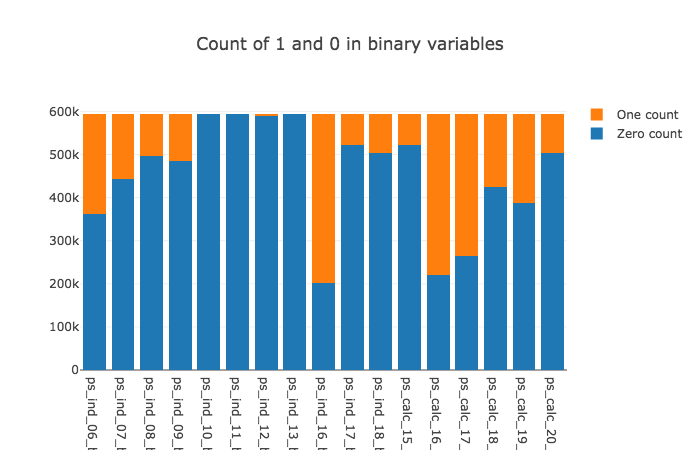

In [75]:
#  カウントした数を1つのバーで表示することで割合が分かるようにする
trace1 = go.Bar(
    x=bin_col,
    y=zero_list ,
    name='Zero count'
)
trace2 = go.Bar(
    x=bin_col,
    y=one_list,
    name='One count'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables'
)

fig = go.Figure(data=data, layout=layout)
#py.iplot(fig, filename='stacked-bar')

display_png(Ipy_Image('stacked-bar.png'))

全体的に０が過半数を占める列が多い、特にps_ind_10からps_ind_13はほぼ０で占められている

Here we observe that there are 4 features : ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin which are completely dominated by zeros. This begs the question of whether these features are useful at all as they do not contain much information about the other class vis-a-vis the target.

ここでは、ps_ind_10_bin、ps_ind_11_bin、ps_ind_12_bin、ps_ind_13_binの4つの特徴が存在することがわかります。  
ps_ind_10_binは完全にゼロによって支配されています。 これは、ターゲットに対する他のクラスに関する多くの情報を含んでいないので、  
これらの特徴がまったく有用であるかどうかという問題を招きます。

## Categorical and Ordinal feature inspection

Let us first take a look at the features that are termed categorical as per their suffix "_cat". 

カテゴリと序列の調査  
最初に、接尾辞 "_cat"のようにカテゴリに分類される特徴を見てみましょう。

## Feature importance via Random Forest

Let us now implement a Random Forest model where we fit the training data with a Random Forest Classifier and look at the ranking of the features after the model has finished training. This is a quick way of using an ensemble model (ensemble of weak decision tree learners applied under Bootstrap aggregated) which does not require much parameter tuning in obtaining useful feature importances and is also pretty robust to target imbalances. We call the Random Forest as follows:


ランダムフォレストによる特徴重要度  
ここではランダムフォレストモデルを実装し、ランダムフォレストクラシファイアとトレーニングデータをfitさせ、モデルがトレーニングを終えた後の特徴のランキングを見てみましょう。 これは、有用な特徴の重要度を取得する際に多くのパラメータ調整を必要とせず、ターゲットの不均衡に対してかなり堅牢なアンサンブルモデル（Bootstrap集約下で適用された弱意思決定ツリー学習器のアンサンブル）を使用する迅速な方法です。 私たちはランダムフォレストを以下のように呼んでいます：

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
rf.fit(train.drop(['id', 'target'],axis=1), train.target)
features = train.drop(['id', 'target'],axis=1).columns.values
print("----- Training Done -----")

----- Training Done -----


**Plot.ly Scatter Plot of feature importances**

Having trained the Random Forest, we can obtain the list of feature importances by invoking the attribute "feature_importances_" and plot our next Plotly plot, the Scatter plot.

Here we invoke the command Scatter and as per the previous Plotly plots, we have to define our y and x-axes. However the one thing that we pay attention to in scatter plots is the marker attribute. It is the marker attribute where we define and hence control the size, color and scale of the scatter points embedded.

特徴重要度のPlot.ly散布図  

ランダムフォレストを訓練した後、属性「featureimportances」を呼び出して次のPlotlyプロット、散布図をプロットして、特徴のインポートのリストを取得できます。

ここでは、Scatterコマンドを呼び出し、前のPlotlyプロットと同様に、y軸とx軸を定義する必要があります。 しかし、散布図に注意を払うのはマーカー属性です。 埋め込まれた散布点のサイズ、色、スケールを定義し、それによって制御するのはマーカー属性です。

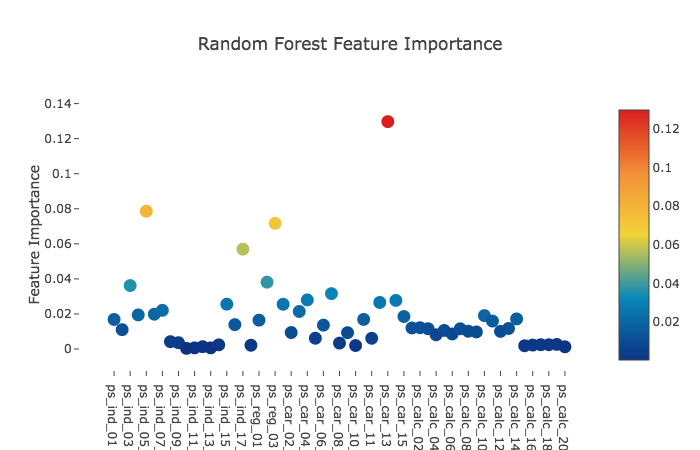

In [77]:
# 各特徴の重要度の散布図を作成する
trace = go.Scatter(
    y = rf.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        showgrid=False,
        zeroline=False,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
#py.iplot(fig,filename='scatter2010')

display_png(Ipy_Image('scatter2010.png'))

ps_car_13の重要度が突出している

Furthermore we could also display a sorted list of all the features ranked by order of their importance, from highest to lowest via the same plotly barplots as follows:

さらに、重要度の高い順にランク付けされたすべての特徴のソートされたリストを、次のような同じプロットの棒グラフを使用して最高から最低まで表示することもできます。

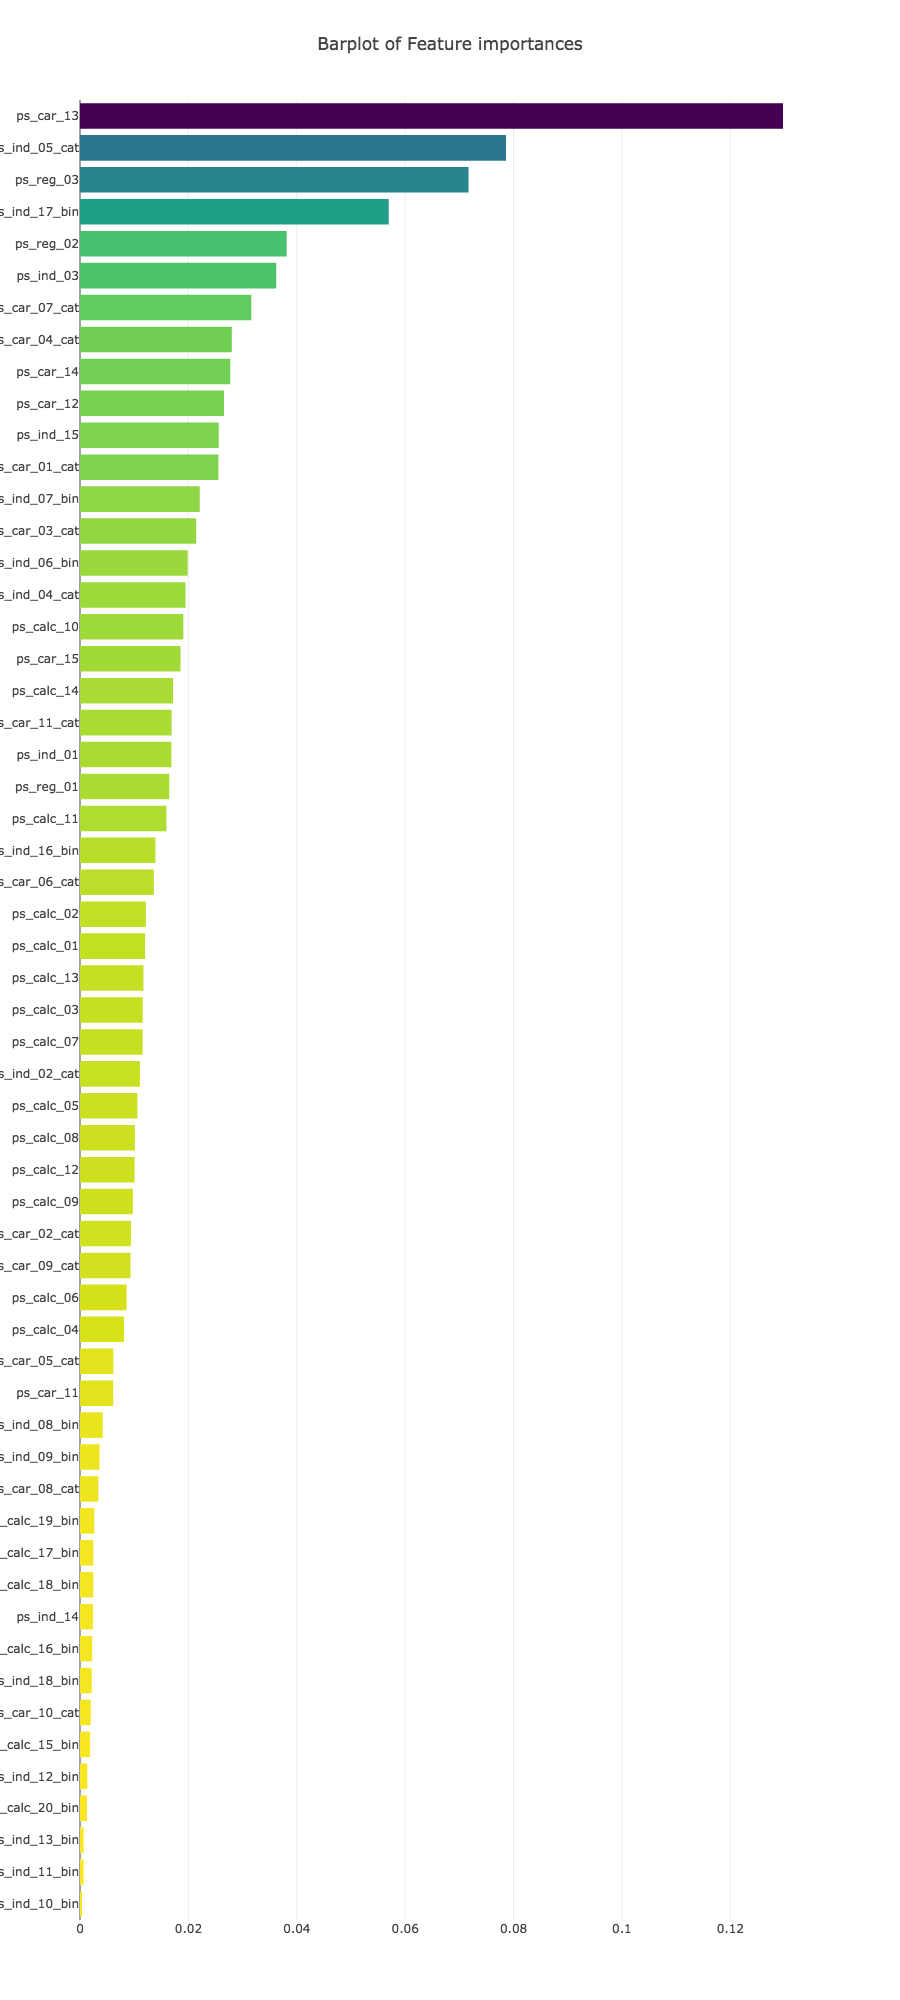

In [78]:
# 各特徴の重要度を降順に表示する
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    )
)

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
#py.iplot(fig1, filename='plots')

display_png(Ipy_Image('plots.png'))

**Decision Tree visualisation**

One other interesting trick or technique oft used would be to visualize the tree branches or decisions made by the model. For simplicity, I fit a decision tree (of max_depth = 3) and hence you only see 3 levels in the decision branch, use the export to graph visualization attribute in sklearn "export_graphviz" and then export and import the tree image for visualization in this notebook.

決定木の視覚化  

他の興味深いトリックやテクニックの1つは、モデルによって作られた木の枝や決定を視覚化することです。 簡単にするために、私は決定木（max_depth = 3）に合わせている、そのため決定ブランチで3つのレベルしか見ることができず、エクスポートをsklearn "export_graphviz"の可視化属性におけるグラフ視覚化属性に使用し、それからグラフに視覚化のための木のイメージをエクスポートしてからこのノートにインポートする。

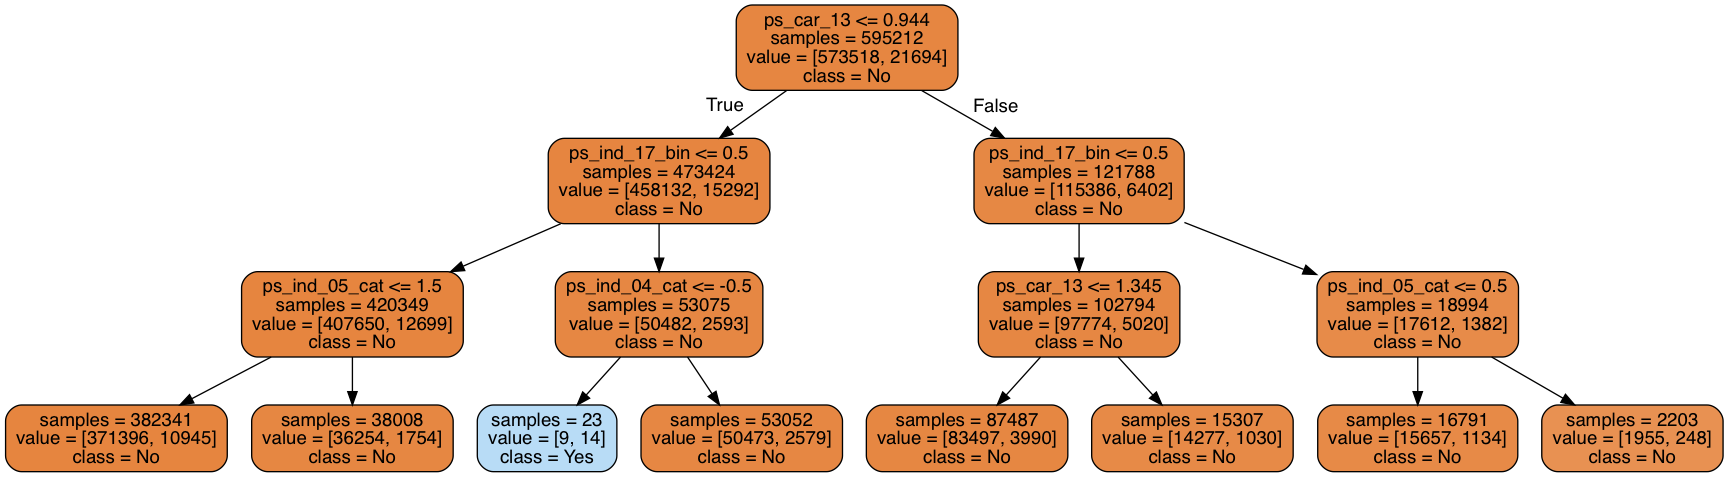

In [79]:
# 決定木を作成し、それを一旦dotファイルで出力し、そのあと、pngに変換してから表示させる
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re

decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(train.drop(['id', 'target'],axis=1), train.target)


with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = train.drop(['id', 'target'],axis=1).columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
# check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png",)

## Feature importance via Gradient Boosting model

Just for curiosity, let us try another learning method in getting our feature importances. This time, we use a Gradient Boosting classifier to fit to the training data . Gradient Boosting proceeds in a forward stage-wise fashion, where at each stage regression tress are fitted on the gradient of the loss function (which defaults to the deviance in Sklearn implementation). 

Gradient Boostingモデルによる特徴重要度¶  
好奇心のために、我々は特徴重要度を得るために別の学習方法を試してみましょう。 今回は、Gradient Boosting分類器を使用してトレーニングデータにfitさせます。 Gradient Boostingは、各ステージで回帰ツリーが損失関数の傾き（Sklearnの実装ではずれがデフォルト値である）に対してfitされる、段階的な方法で進行します。

In [80]:
# sklearnの勾配ブースティング分類器を用いて特徴重要度を求める
from sklearn.ensemble import GradientBoostingClassifier
# インスタンス作成
gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, min_samples_leaf=4, max_features=0.2, random_state=0)
# 学習実施
gb.fit(train.drop(['id', 'target'],axis=1), train.target)
# id列とtarget列を削除したあとの列名を取得する
features = train.drop(['id', 'target'],axis=1).columns.values
print(features)
print("----- Training Done -----")

['ps_ind_01' 'ps_ind_02_cat' 'ps_ind_03' 'ps_ind_04_cat' 'ps_ind_05_cat'
 'ps_ind_06_bin' 'ps_ind_07_bin' 'ps_ind_08_bin' 'ps_ind_09_bin'
 'ps_ind_10_bin' 'ps_ind_11_bin' 'ps_ind_12_bin' 'ps_ind_13_bin'
 'ps_ind_14' 'ps_ind_15' 'ps_ind_16_bin' 'ps_ind_17_bin' 'ps_ind_18_bin'
 'ps_reg_01' 'ps_reg_02' 'ps_reg_03' 'ps_car_01_cat' 'ps_car_02_cat'
 'ps_car_03_cat' 'ps_car_04_cat' 'ps_car_05_cat' 'ps_car_06_cat'
 'ps_car_07_cat' 'ps_car_08_cat' 'ps_car_09_cat' 'ps_car_10_cat'
 'ps_car_11_cat' 'ps_car_11' 'ps_car_12' 'ps_car_13' 'ps_car_14'
 'ps_car_15' 'ps_calc_01' 'ps_calc_02' 'ps_calc_03' 'ps_calc_04'
 'ps_calc_05' 'ps_calc_06' 'ps_calc_07' 'ps_calc_08' 'ps_calc_09'
 'ps_calc_10' 'ps_calc_11' 'ps_calc_12' 'ps_calc_13' 'ps_calc_14'
 'ps_calc_15_bin' 'ps_calc_16_bin' 'ps_calc_17_bin' 'ps_calc_18_bin'
 'ps_calc_19_bin' 'ps_calc_20_bin']
----- Training Done -----


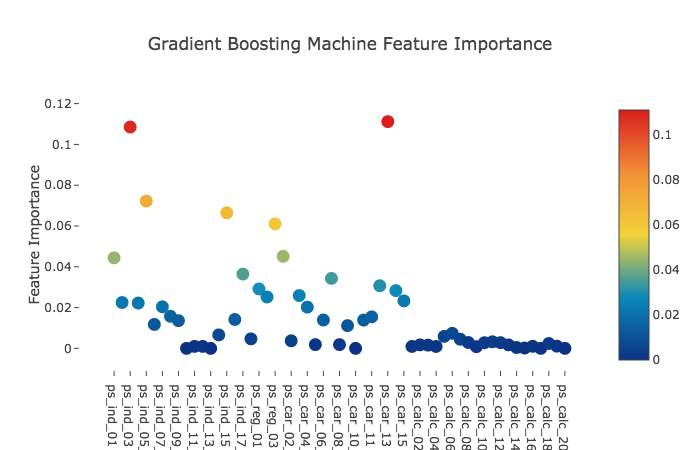

In [81]:
# 各特徴の重要度の散布図を作成する
trace = go.Scatter(
    y = gb.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Machine Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
#py.iplot(fig,filename='scatter2010_2')

display_png(Ipy_Image('scatter2010_2.png'))

ps_car_13に加えて、ps_ind_03の重要度が高い結果となっている

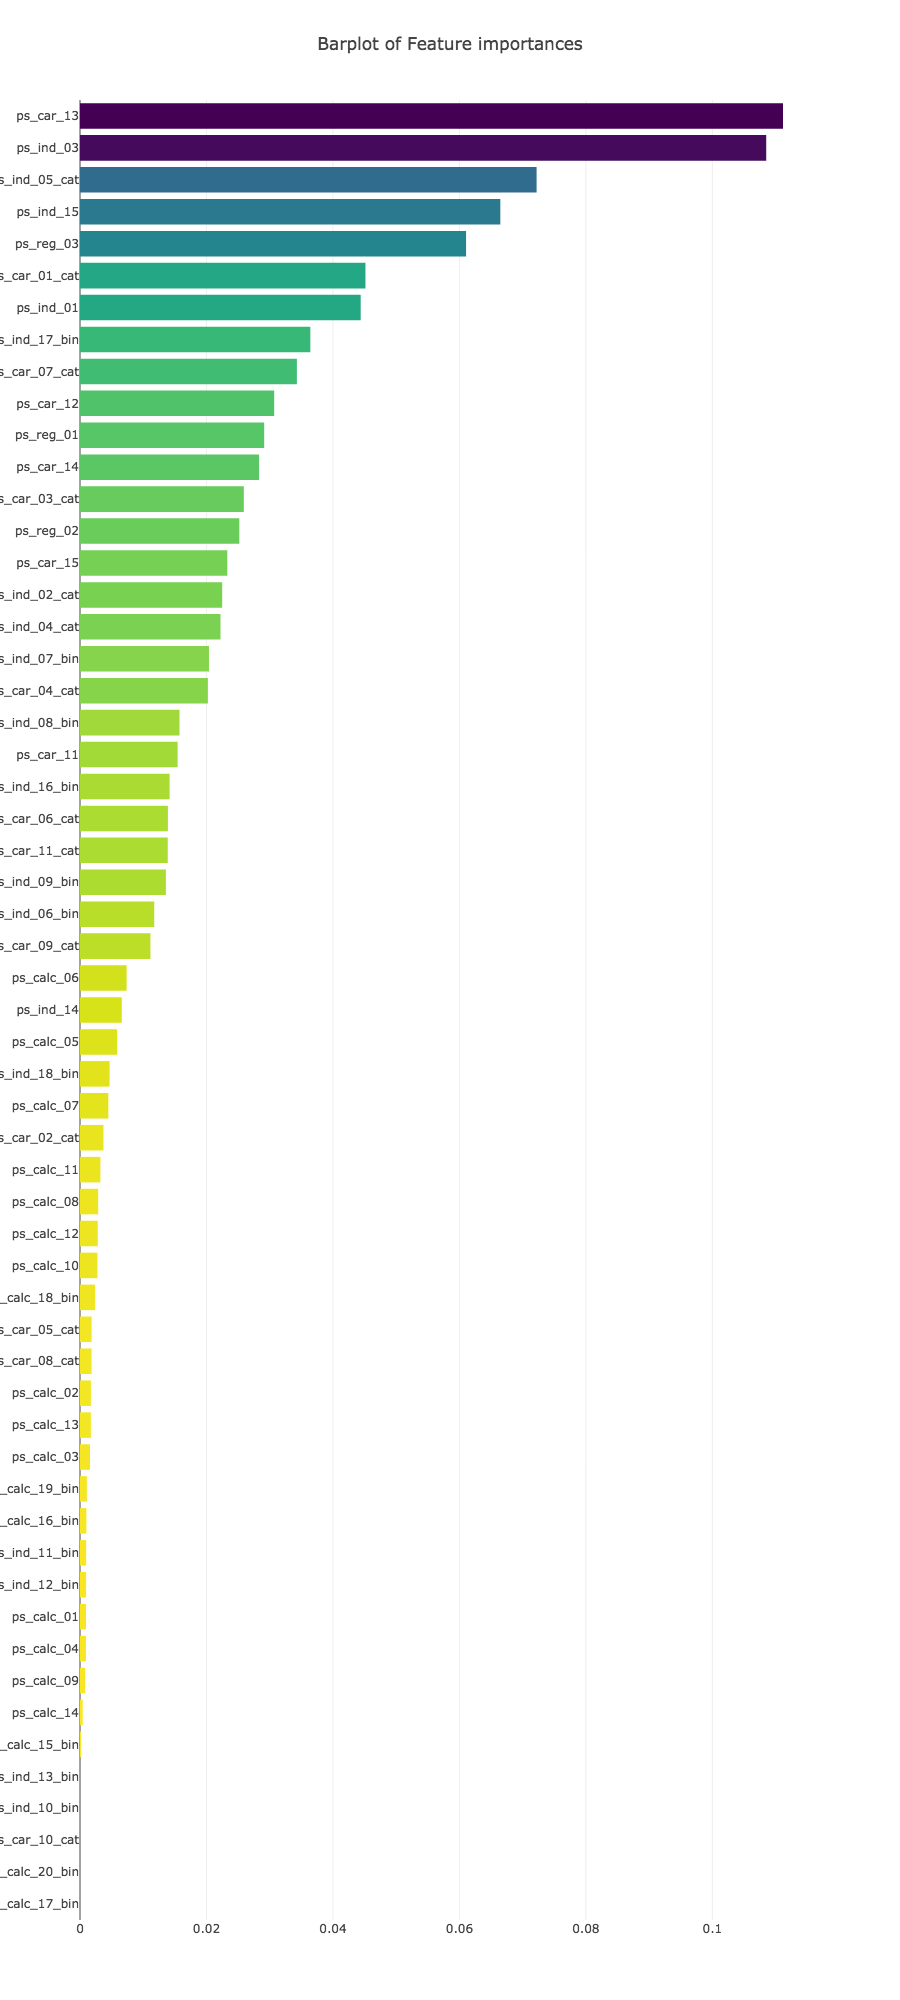

In [82]:
#重要度が高い順に水平バープロットで表示する
x, y = (list(x) for x in zip(*sorted(zip(gb.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Gradient Boosting Classifer Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
#py.iplot(fig1, filename='plots_2')

display_png(Ipy_Image('plots_2.png'))

Interestingly we observe that in both Random forest and Gradient Boosted learning models, the most important feature that both models picked out was the column : **ps_car_13**. 

This particular feature warrants further investigation so let us conduct a deep-dive into it.


興味深いことに、ランダムフォレストとグラジエントブースト学習モデルの両方で、両方のモデルが選んだ最も重要な  
特徴は、列：ps_car_13でした。

この特定の特徴は詳細な調査を必要とするため、深く掘り下げて検討してください。

# Conclusion

We have performed quite an extensive inspection of the Porto Seguro dataset by inspecting for null values and data quality, investigated linear correlations between features, inspected some of the feature distributions  as well as implemented a couple of learning models (Random forest and Gradient Boosting classifier) so as to identify features that the models deemed important. 

結論  
我々は、ヌル値とデータ品質を検査し、フィーチャ間の線形相関を調べ、フィーチャ分布のいくつかを検査し、  
いくつかの学習モデル（ランダムフォレストとグラジエントブースト分類器）をモデルが重要と考える特徴を確認するために実装して、  
Porto Seguroデータセットのかなりの検査を行いました。

# *To Be Continued..*

つづく